In [1]:
import sklearn.linear_model as linear_model
from matplotlib.pyplot import *
from xarray import open_dataset

In [2]:
downsample = 10000
climate_data = open_dataset('data/climate-data.nc')\
.to_dataframe()[::downsample].reset_index(level=[0,1], drop=True)

climate_data.sort_index(inplace=True)
climate_data

,longitude,latitude,land_mask,temperature,climatology
time,,,,,
1750.041667,-83.571426,82.788071,0.310081,NaN,-33.603367
1750.041667,13.150685,-12.051556,0.202500,NaN,20.707054
1750.041667,42.786884,57.052761,0.955000,1.593049,11.611300
1750.041667,-57.810219,-52.237446,0.130000,NaN,8.356696
1750.041667,-13.783784,8.839602,0.150000,NaN,27.562996
...,...,...,...,...,...
2020.708333,-51.545456,-10.446893,1.000000,2.891641,26.403969
2020.708333,-5.727273,10.446893,1.000000,0.461901,26.342127
2020.708333,-60.346821,-39.383591,0.218000,0.670020,13.123789


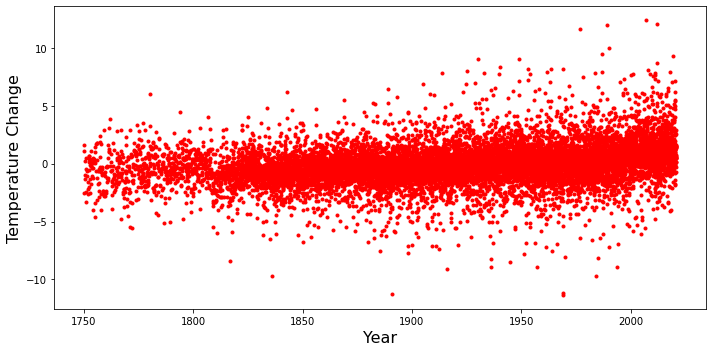

In [3]:
figure(figsize=(10,5))
climate_data.temperature.plot(color='r',marker='.',linewidth=0)

xlabel('Year',fontsize=16)
ylabel('Temperature Change',fontsize=16)
tight_layout()

In [4]:
nanmask = ~climate_data.temperature.isna()
X = climate_data[nanmask].index.to_numpy().reshape(-1,1)
y = climate_data[nanmask].temperature.to_numpy()

In [5]:
model = linear_model.LinearRegression(n_jobs=-1)
model.fit(X,y)

LinearRegression(n_jobs=-1)

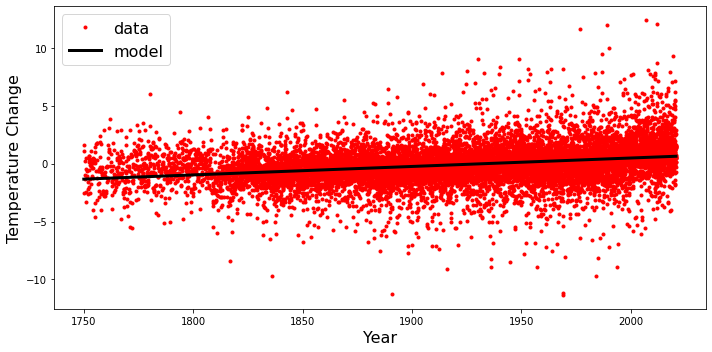

In [6]:
figure(figsize=(10,5))

climate_data.temperature.plot(color='r',marker='.',linewidth=0, label='data')
plot(X.flatten(),model.predict(X),label='model',linewidth=3,color='k')

xlabel('Year',fontsize=16)
ylabel('Temperature Change',fontsize=16)

legend(fontsize=16)
tight_layout()